# Hello, Ignite ML with Ignite Cache!

This document contains example of Ignite ML Python API for training on Ignite Cache.

In [1]:
from ignite_ml.core import Ignite

from sklearn.datasets import make_regression
from sklearn.datasets import make_classification 
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score 

from ignite_ml.model_selection import train_test_split as ignite_train_test_split
from ignite_ml.metrics import rmse_score as ignite_rmse_score

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Regression

Lets prepare a regression dataset using scikit-learn.

In [2]:
x, y = make_regression(n_targets=1)
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [3]:
def test_regression_on_cache(fun):
    with Ignite("/home/gridgain/ignite/examples/config/example-ignite.xml") as ignite:
        xy = np.column_stack((x, y))
        cache = ignite.create_cache("test-regression", parts=1)
        for i in range(xy.shape[0]):
            cache.put(i, xy[i])
        return fun(cache)

### 1.1. Linear Regression

Now lets train a linear model using Ignite ML and estimate the quality of the model:

In [4]:
from ignite_ml.regression import LinearRegressionTrainer
from ignite_ml.metrics import rss_score
from ignite_ml.metrics import mse_score


def train_and_score(cache):
    train_cache, test_cache = ignite_train_test_split(cache)
    trainer = LinearRegressionTrainer()
    model = trainer.fit(train_cache)
    return ignite_rmse_score(test_cache, model)

test_regression_on_cache(train_and_score)

50.090714305022225

And just to compare lets do the same for scikit-learn:

In [5]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train, y_train)
r2_score(y_test, reg.predict(x_test))

0.7986691493360564

### 1.2. Decision Tree Regression

Using Ignite ML:

In [6]:
from ignite_ml.regression import DecisionTreeRegressionTrainer

def train_and_score(cache):
    train_cache, test_cache = ignite_train_test_split(cache)
    trainer = DecisionTreeRegressionTrainer()
    model = trainer.fit(train_cache)
    return ignite_rmse_score(test_cache, model)

test_regression_on_cache(train_and_score)

108.49471772042358

And using scikit-learn:

In [7]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor()
reg.fit(x_train, y_train)
r2_score(y_test, reg.predict(x_test))

-0.20660717738762457

### 1.3. KNN Regression

Using Ignite ML:

In [8]:
from ignite_ml.regression import KNNRegressionTrainer
    
def train_and_score(cache):
    train_cache, test_cache = ignite_train_test_split(cache)
    trainer = KNNRegressionTrainer()
    model = trainer.fit(train_cache)
    return ignite_rmse_score(test_cache, model)

test_regression_on_cache(train_and_score)

162.83173018529789

And using scikit-learn:

In [9]:
from sklearn.neighbors import KNeighborsRegressor

reg = KNeighborsRegressor()
reg.fit(x_train, y_train)
r2_score(y_test, reg.predict(x_test))

0.1924421039990688

### 1.4 Random Forest Regression

Using Ignite ML:

In [10]:
from ignite_ml.regression import RandomForestRegressionTrainer

def train_and_score(cache):
    train_cache, test_cache = ignite_train_test_split(cache)
    trainer = RandomForestRegressionTrainer(100)
    model = trainer.fit(train_cache)
    return ignite_rmse_score(test_cache, model)

test_regression_on_cache(train_and_score)

340.2712825258595

In [11]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor()
reg.fit(x_train, y_train)
r2_score(y_test, reg.predict(x_test))

/home/gridgain/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.1202513099086906

### 1.5 MLP Regression

Using Ignite ML:

In [12]:
from ignite_ml.common import MLPArchitecture
from ignite_ml.regression import MLPRegressionTrainer

def train_and_score(cache):
    train_cache, test_cache = ignite_train_test_split(cache)
    trainer = MLPRegressionTrainer(MLPArchitecture(100).with_layer(1, activator='linear'))
    model = trainer.fit(train_cache)
    return r2_score(y_test, model.predict(x_test))

test_regression_on_cache(train_and_score)

0.9739369891576413

And using scikit-learn:

In [13]:
from sklearn.neural_network import MLPRegressor

reg = MLPRegressor(max_iter=10000)
reg.fit(x_train, y_train)
r2_score(y_test, reg.predict(x_test))

0.35738244452792833

## 2. Classification

Lets prepare a classification dataset using scikit-learn.

In [14]:
x, y = make_classification()
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [15]:
def test_regression_on_cache(fun):
    with Ignite("/home/gridgain/ignite/examples/config/example-ignite.xml") as ignite:
        xy = np.column_stack((x, y))
        cache = ignite.create_cache("test-classification", parts=1)
        for i in range(xy.shape[0]):
            cache.put(i, xy[i])
        return fun(cache)

### 2.1 Decision Tree Classification

Using Ignite ML:

In [16]:
from ignite_ml.classification import DecisionTreeClassificationTrainer
from ignite_ml.metrics import accuracy_score as ignite_accuracy_score

def train_and_score(cache):
    train_cache, test_cache = ignite_train_test_split(cache)
    trainer = DecisionTreeClassificationTrainer()
    model = trainer.fit(train_cache)
    return ignite_accuracy_score(test_cache, model)

test_regression_on_cache(train_and_score)

0.98

And using scikit-learn:

In [17]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
accuracy_score(y_test, clf.predict(x_test))

0.92

### 2.2 ANN Classification

Using Ignite ML:

In [18]:
from ignite_ml.classification import ANNClassificationTrainer

def train_and_score(cache):
    train_cache, test_cache = ignite_train_test_split(cache)
    trainer = ANNClassificationTrainer()
    model = trainer.fit(train_cache)
    return ignite_accuracy_score(test_cache, model)

test_regression_on_cache(train_and_score)

0.5

### 2.3 KNN Classification

Using Ignite ML:

In [19]:
from ignite_ml.classification import KNNClassificationTrainer

def train_and_score(cache):
    train_cache, test_cache = ignite_train_test_split(cache)
    trainer = KNNClassificationTrainer()
    model = trainer.fit(train_cache)
    return ignite_accuracy_score(test_cache, model)

test_regression_on_cache(train_and_score)

0.93

And using scikit-learn:

In [20]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(x_train, y_train)
accuracy_score(y_test, clf.predict(x_test))

0.88

### 2.4 LogReg Classification

Using Ignite ML:

In [21]:
from ignite_ml.classification import LogRegClassificationTrainer

def train_and_score(cache):
    train_cache, test_cache = ignite_train_test_split(cache)
    trainer = LogRegClassificationTrainer()
    model = trainer.fit(train_cache)
    return ignite_accuracy_score(test_cache, model)

test_regression_on_cache(train_and_score)

0.91

And using scikit-learn:

In [22]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(x_train, y_train)
accuracy_score(y_test, clf.predict(x_test))

0.96

### 2.5 SVM Classification

Using Ignite ML:

In [23]:
from ignite_ml.classification import SVMClassificationTrainer

def train_and_score(cache):
    train_cache, test_cache = ignite_train_test_split(cache)
    trainer = SVMClassificationTrainer()
    model = trainer.fit(train_cache)
    return ignite_accuracy_score(test_cache, model)

test_regression_on_cache(train_and_score)

0.97

And using scikit-learn:

In [24]:
from sklearn.svm import LinearSVC

clf = LinearSVC()
clf.fit(x_train, y_train)
accuracy_score(y_test, clf.predict(x_test))

0.96

### 2.6 Random Forest Classification

Using Ignite ML:

In [25]:
from ignite_ml.classification import RandomForestClassificationTrainer

def train_and_score(cache):
    train_cache, test_cache = ignite_train_test_split(cache)
    trainer = RandomForestClassificationTrainer(20)
    model = trainer.fit(train_cache)
    return ignite_accuracy_score(test_cache, model)

test_regression_on_cache(train_and_score)

0.97

And using scikit-learn:

In [26]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(x_train, y_train)
accuracy_score(y_test, clf.predict(x_test))

0.88

## 3. Clustering

Lets prepare a clustering dataset using scikit-learn.

In [27]:
x, y = make_blobs(n_samples=2000, n_features=2, cluster_std=1.0, centers=[(-3, -3), (0, 0), (3, 3)])

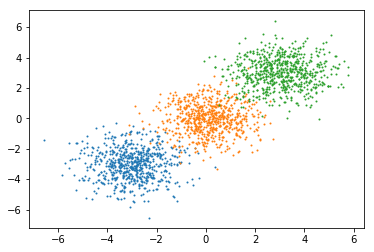

In [28]:
for i in range(3):
    plt.scatter(x[y == i][:, 0], x[y == i][:, 1], s=1)

In [29]:
def test_clustering_on_cache(fun):
    with Ignite("/home/gridgain/ignite/examples/config/example-ignite.xml") as ignite:
        xy = np.column_stack((x, y))
        cache = ignite.create_cache("test-clustering", parts=1)
        for i in range(xy.shape[0]):
            cache.put(i, xy[i])
        return fun(cache)

### 3.1 KMeans Clustering

Using Ignite ML:

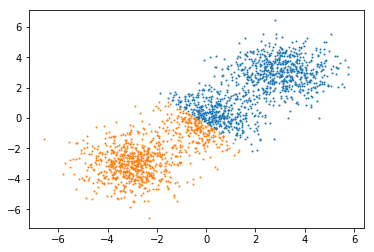

In [30]:
from ignite_ml.clustering import KMeansClusteringTrainer

def train_and_score(cache):
    train_cache, test_cache = ignite_train_test_split(cache)
    trainer = KMeansClusteringTrainer(amount_of_clusters=2)
    return trainer.fit(train_cache)

model = test_clustering_on_cache(train_and_score)

y_predicted = np.array(model.predict(x))
for i in range(2):
    plt.scatter(x[y_predicted == i][:, 0], x[y_predicted == i][:, 1], s=1)

And using scikit-learn:

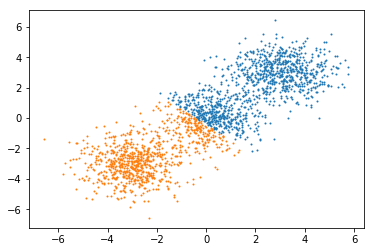

In [31]:
from sklearn.cluster import KMeans

clr = KMeans(n_clusters=2)
clr.fit(x)

y_predicted = np.array(clr.predict(x))
for i in range(2):
    plt.scatter(x[y_predicted == i][:, 0], x[y_predicted == i][:, 1], s=1)

### 3.2 GMM Clustering

Using Ignite ML:

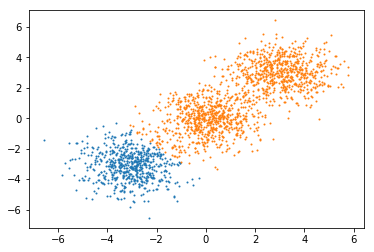

In [32]:
from ignite_ml.clustering import GMMClusteringTrainer

def train_and_score(cache):
    train_cache, test_cache = ignite_train_test_split(cache)
    trainer = GMMClusteringTrainer(count_of_components=2, max_count_of_clusters=2)
    return trainer.fit(train_cache)

model = test_clustering_on_cache(train_and_score)

y_predicted = np.array(model.predict(x))
for i in range(2):
    plt.scatter(x[y_predicted == i][:, 0], x[y_predicted == i][:, 1], s=1)